# UNSUPERVISED KNN MODEL

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np

In [2]:
#to display entire contents of coloums
pd.set_option("display.max_colwidt",-1) 

C:\Users\Bhavya\AppData\Local\Temp\ipykernel_6120\1927977362.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidt",-1)


# Loading data

In [3]:
# loading the dataset into python
people = pd.read_csv('people_wiki.csv') 

# Intial exploring data

In [4]:
# showing the first 5 entries of data set
people.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former australian rules footballer who played with the kangaroos and carlton in the australian football league aflfrom western australia morrell played his early senior football for west perth his 44game senior career for the falcons spanned 19982000 and he was the clubs leading goalkicker in 2000 at the age of 21 morrell was recruited to the australian football league by the kangaroos football club with its third round selection in the 2001 afl rookie draft as a forward he twice kicked five goals during his time with the kangaroos the first was in a losing cause against sydney in 2002 and the other the following season in a drawn game against brisbaneafter the 2003 season morrell was traded along with david teague to the carlton football club in exchange for corey mckernan he played 32 games for the blues before being delisted at the end of 2005 he continued to play victorian football league vfl football with the northern bullants carltons vflaffiliate in 2006 and acted as playing assistant coach in 2007 in 2008 he shifted to the box hill hawks before retiring from playing at the end of the season from 2009 until 2013 morrell was the senior coach of the strathmore football club in the essendon district football league leading the club to the 2011 premier division premiership since 2014 he has coached the west coburg football club also in the edflhe currently teaches physical education at parade college in melbourne
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from university of chicago in 1973 after studying psychiatry pharmacology and ophthalmology he is a full professor and vicechair of the department of psychiatry at ohsu oregon health science university and holds an md and phd prior to moving to oregon in 1981 lewy was at the national institute of mental health nimh in bethesda maryland working with senior colleague thomas wehr in oregon he has worked closely with robert l sack as of december 2005 he had 94 publications available on pubmed he describes his research as follows my laboratory studies chronobiologic sleep and mood disorders these disorders include winter depression jet lag maladaptation to shift work and certain types of sleep disturbances relying on a very precise assay for plasma melatonin a hormone that has a clearly defined 24hour pattern of secretion biological rhythm disorders can be assessed and their treatment can be monitored current research is focused on developing bright light exposure and melatonin administration as treatment modalities for these disorders treatment must be precisely scheduled morning light exposure and evening melatonin administration cause circadian phaseadvance shifts evening light exposure and morning melatonin administration cause circadian phasedelay shifts totally blind individuals have 25hour circadian rhythms drifting an hour later each day unless they take a melatonin capsule at a certain time every day
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player who has been active in canadas blues scene since 1982 hailing from vancouver he crossed tens of thousands of miles playing club dates and festivals in canada the northwestern united states and germanyover the years he has issued seven cds in 1995 his home is where the harp is won the muddy award for the best nw blues release from the cascade blues association in portland oregon as well that year it was nominated for a canadian juno for the best bluesgospel recording teamed up with graham guest on piano his cd naturally was voted 1 canadian blues album of 2010 by the blind lemon surveybrown tours extensively with his guitarist j arthur edmonds performing their electric mid1950s chicago blues either as a duo or with the full band while he is home he juggles a few combos working many venues big and sm

In [5]:
people.shape # there are 3 coloums and 59071 coloumns in the dataset

(59071, 3)

In [6]:
len(people) 

59071

Data contains: link to wikipedia article, name of person, text of article.<br>
There are 3 coloums and 59071 rows in the dataset

# Data cleaning

In [7]:
people.info() #all columns have correct data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59071 entries, 0 to 59070
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URI     59071 non-null  object
 1   name    59071 non-null  object
 2   text    59071 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


In [8]:
people['name'].unique()

array(['Digby Morrell', 'Alfred J. Lewy', 'Harpdog Brown', ...,
       'David Cass (footballer)', 'Keith Elias', 'Fawaz Damrah'],
      dtype=object)

In [9]:
people.isnull().any() #no missing values

URI     False
name    False
text    False
dtype: bool

as all the data types assigned are correct and there are no missing value, we can say that tha data is already clean 

## Exploring the data entry for President Obama

In [10]:
obama = people[people['name'] == 'Barack Obama'] #creating variable for the row obama

In [11]:
type(obama)

pandas.core.frame.DataFrame

In [12]:
obama

,URI,name,text
35817,<http://dbpedia.org/resource/Barack_Obama>,Barack Obama,barack hussein obama ii brk husen bm born august 4 1961 is the 44th and current president of the united states and the first african american to hold the office born in honolulu hawaii obama is a graduate of columbia university and harvard law school where he served as president of the harvard law review he was a community organizer in chicago before earning his law degree he worked as a civil rights attorney and taught constitutional law at the university of chicago law school from 1992 to 2004 he served three terms representing the 13th district in the illinois senate from 1997 to 2004 running unsuccessfully for the united states house of representatives in 2000in 2004 obama received national attention during his campaign to represent illinois in the united states senate with his victory in the march democratic party primary his keynote address at the democratic national convention in july and his election to the senate in november he began his presidential campaign in 2007 and after a close primary campaign against hillary rodham clinton in 2008 he won sufficient delegates in the democratic party primaries to receive the presidential nomination he then defeated republican nominee john mccain in the general election and was inaugurated as president on january 20 2009 nine months after his election obama was named the 2009 nobel peace prize laureateduring his first two years in office obama signed into law economic stimulus legislation in response to the great recession in the form of the american recovery and reinvestment act of 2009 and the tax relief unemployment insurance reauthorization and job creation act of 2010 other major domestic initiatives in his first term included the patient protection and affordable care act often referred to as obamacare the doddfrank wall street reform and consumer protection act and the dont ask dont tell repeal act of 2010 in foreign policy obama ended us military involvement in the iraq war increased us troop levels in afghanistan signed the new start arms control treaty with russia ordered us military involvement in libya and ordered the military operation that resulted in the death of osama bin laden in january 2011 the republicans regained control of the house of representatives as the democratic party lost a total of 63 seats and after a lengthy debate over federal spending and whether or not to raise the nations debt limit obama signed the budget control act of 2011 and the american taxpayer relief act of 2012obama was reelected president in november 2012 defeating republican nominee mitt romney and was sworn in for a second term on january 20 2013 during his second term obama has promoted domestic policies related to gun control in response to the sandy hook elementary school shooting and has called for full equality for lgbt americans while his administration has filed briefs which urged the supreme court to strike down the defense of marriage act of 1996 and californias proposition 8 as unconstitutional in foreign policy obama ordered us military involvement in iraq in response to gains made by the islamic state in iraq after the 2011 withdrawal from iraq continued the process of ending us combat operations in afghanistan and has sought to normalize us relations with cuba


In [13]:
print(obama['text'])

35817    barack hussein obama ii brk husen bm born august 4 1961 is the 44th and current president of the united states and the first african american to hold the office born in honolulu hawaii obama is a graduate of columbia university and harvard law school where he served as president of the harvard law review he was a community organizer in chicago before earning his law degree he worked as a civil rights attorney and taught constitutional law at the university of chicago law school from 1992 to 2004 he served three terms representing the 13th district in the illinois senate from 1997 to 2004 running unsuccessfully for the united states house of representatives in 2000in 2004 obama received national attention during his campaign to represent illinois in the united states senate with his victory in the march democratic party primary his keynote address at the democratic national convention in july and his election to the senate in november he began his presidential campaign in 2007 

In [14]:
#length of text stored in obama
len(str(obama['text']).split()) #split used to count words using space as the diffrenciators between words

545

# Get the count vectorization for Obama article

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
count_vectorizer = CountVectorizer() # convert text to numerical data that is word:frequency 
count = count_vectorizer.fit_transform(people['text']) #fit_transform is used to learn the vocabulary dictionary and return document-term matrix.


In [17]:
analyzer = count_vectorizer.build_analyzer() 
# Return a callable to process input data.
# The callable handles preprocessing, tokenization, and n-grams generation.

In [18]:
voc = count_vectorizer.vocabulary_ #A mapping of terms to feature indices.
rvoc = dict(zip(voc.values(),voc.keys()))

In [19]:
#defining a function to count the frequecy of a word used in the text and returning in a dictionary format

def count_words(doc):
    dic = {}
    if analyzer(doc):
        M = count_vectorizer.fit_transform([doc]).toarray()[0] #Convert the TF-IDF scores into a vector representation
        for word,index in count_vectorizer.vocabulary_.items():
            dic[word] = M[index]
    return dic

In [20]:
obama['word_count'] = obama['text'].apply(count_words)

C:\Users\Bhavya\AppData\Local\Temp\ipykernel_6120\1604818365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obama['word_count'] = obama['text'].apply(count_words)


In [21]:
obama['word_count'] #we can see there is no order in which the dictonary is made

35817    {'barack': 1, 'hussein': 1, 'obama': 9, 'ii': 1, 'brk': 1, 'husen': 1, 'bm': 1, 'born': 2, 'august': 1, '1961': 1, 'is': 2, 'the': 40, '44th': 1, 'and': 21, 'current': 1, 'president': 4, 'of': 18, 'united': 3, 'states': 3, 'first': 3, 'african': 1, 'american': 3, 'to': 14, 'hold': 1, 'office': 2, 'in': 30, 'honolulu': 1, 'hawaii': 1, 'graduate': 1, 'columbia': 1, 'university': 2, 'harvard': 2, 'law': 6, 'school': 3, 'where': 1, 'he': 7, 'served': 2, 'as': 6, 'review': 1, 'was': 5, 'community': 1, 'organizer': 1, 'chicago': 2, 'before': 1, 'earning': 1, 'his': 11, 'degree': 1, 'worked': 1, 'civil': 1, 'rights': 1, 'attorney': 1, 'taught': 1, 'constitutional': 1, 'at': 2, 'from': 3, '1992': 1, '2004': 3, 'three': 1, 'terms': 1, 'representing': 1, '13th': 1, 'district': 1, 'illinois': 2, 'senate': 3, '1997': 1, 'running': 1, 'unsuccessfully': 1, 'for': 4, 'house': 2, 'representatives': 2, '2000in': 1, 'received': 1, 'national': 2, 'attention': 1, 'during': 2, 'campaign': 3, 'repr

In [22]:
obama #a new coloumn of the word count has been added

,URI,name,text,word_count
35817,<http://dbpedia.org/resource/Barack_Obama>,Barack Obama,barack hussein obama ii brk husen bm born august 4 1961 is the 44th and current president of the united states and the first african american to hold the office born in honolulu hawaii obama is a graduate of columbia university and harvard law school where he served as president of the harvard law review he was a community organizer in chicago before earning his law degree he worked as a civil rights attorney and taught constitutional law at the university of chicago law school from 1992 to 2004 he served three terms representing the 13th district in the illinois senate from 1997 to 2004 running unsuccessfully for the united states house of representatives in 2000in 2004 obama received national attention during his campaign to represent illinois in the united states senate with his victory in the march democratic party primary his keynote address at the democratic national convention in july and his election to the senate in november he began his presidential campaign in 2007 and after a close primary campaign against hillary rodham clinton in 2008 he won sufficient delegates in the democratic party primaries to receive the presidential nomination he then defeated republican nominee john mccain in the general election and was inaugurated as president on january 20 2009 nine months after his election obama was named the 2009 nobel peace prize laureateduring his first two years in office obama signed into law economic stimulus legislation in response to the great recession in the form of the american recovery and reinvestment act of 2009 and the tax relief unemployment insurance reauthorization and job creation act of 2010 other major domestic initiatives in his first term included the patient protection and affordable care act often referred to as obamacare the doddfrank wall street reform and consumer protection act and the dont ask dont tell repeal act of 2010 in foreign policy obama ended us military involvement in the iraq war increased us troop levels in afghanistan signed the new start arms control treaty with russia ordered us military involvement in libya and ordered the military operation that resulted in the death of osama bin laden in january 2011 the republicans regained control of the house of representatives as the democratic party lost a total of 63 seats and after a lengthy debate over federal spending and whether or not to raise the nations debt limit obama signed the budget control act of 2011 and the american taxpayer relief act of 2012obama was reelected president in november 2012 defeating republican nominee mitt romney and was sworn in for a second term on january 20 2013 during his second term obama has promoted domestic policies related to gun control in response to the sandy hook elementary school shooting and has called for full equality for lgbt americans while his administration has filed briefs which urged the supreme court to strike down the defense of marriage act of 1996 and californias proposition 8 as unconstitutional in foreign policy obama ordered us military involvement in iraq in response to gains made by the islamic state in iraq after the 2011 withdrawal from iraq continued the process of ending us combat operations in afghanistan and has sought to normalize us relations with cuba,"{'barack': 1, 'hussein': 1, 'obama': 9, 'ii': 1, 'brk': 1, 'husen': 1, 'bm': 1, 'born': 2, 'august': 1, '1961': 1, 'is': 2, 'the': 40, '44th': 1, 'and': 21, 'current': 1, 'president': 4, 'of': 18, 'united': 3, 'states': 3, 'first': 3, 'african': 1, 'american': 3, 'to': 14, 'hold': 1, 'office': 2, 'in': 30, 'honolulu': 1, 'hawaii': 1, 'graduate': 1, 'columbia': 1, 'university': 2, 'harvard': 2, 'law': 6, 'school': 3, 'where': 1, 'he': 7, 'served': 2, 'as': 6, 'review': 1, 'was': 5, 'community': 1, 'organizer': 1, 'chicago': 2, 'before': 1, 'earning': 1, 'his': 11, 'degree': 1, 'worked': 1, 'civil': 1, 'rights': 1, 'attorney':

## Sort the word counts for the Obama article

### Turning dictonary of word counts into a table

In [23]:
obama_word_count_table = pd.DataFrame(obama['word_count'].values[0].items(),columns=['word','count'])

### Sorting the word counts to show most common words at the top

In [24]:
obama_word_count_table.sort_values(by='count',ascending=False).head() #decending order of the frequecy of words

,word,count
11,the,40
25,in,30
13,and,21
16,of,18
22,to,14


Most common words include uninformative words like "the", "in", "and",... these should be made as important in finding other relatable articles

# Compute TF-IDF for the corpus 

To give more weight to informative words, we weigh them by their TF-IDF scores.

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer

In [26]:
#inbuilt functions to find tf-idf
tfidftransformer = TfidfTransformer(norm=None)
tfidf_weight = tfidftransformer.fit_transform(count)

## Examine the TF-IDF for the Obama article

In [27]:
obama = people[people['name'] == 'Barack Obama']

In [28]:
# finding the tf-idf value of each word 
word = [rvoc[i] for i in tfidf_weight[obama.index[0]].indices]

# displaying the tfifd value in descending order
# the largest tfidf values show the most important words of the article hece words like 'a','is' losse there value even though they are so frequently used
obama_word_count_table = pd.DataFrame({'word':word,'tfidf':tfidf_weight[obama.index[0]].data})
obama_word_count_table.sort_values(by='tfidf',ascending =False)

,word,tfidf
109,obama,52.277114
27,the,40.004063
251,act,35.674051
154,in,30.028962
146,iraq,21.741728
...,...,...
145,is,2.055232
117,new,1.887211
6,which,1.767411
28,that,1.661391


Words with highest TF-IDF are much more informative.

# Creating a word cloud

In [29]:
# !pip install wordcloud

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

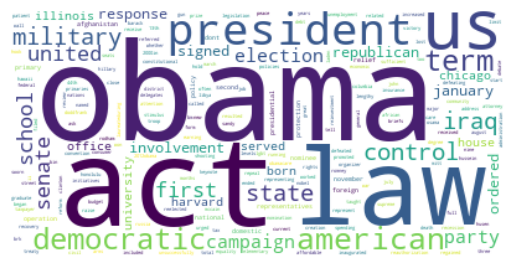

In [31]:
obt=str(obama['text'])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(obt)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Manually compute distances using Cosine Distance


## Is Obama closer to Clinton than to Beckham?

We will use cosine distance, which is given by (1-cosine_similarity) 

to find that the article about president Obama is closer to the one about former president Clinton than that of footballer David Beckham.

smaller the distance morerecated the 2 articles are

In [32]:
from sklearn.metrics.pairwise import cosine_distances

In [33]:
clinton = people[people['name'] == 'Bill Clinton']

In [34]:
beckham = people[people['name'] == 'David Beckham']

In [35]:
# distance btwn obama and clinton
cosine_distances(tfidf_weight[obama.index[0]],tfidf_weight[clinton.index[0]]) #0 is used as we need to access the 0th row of the table

array([[0.67497775]])

In [36]:
# distance btwn obama and beckam
cosine_distances(tfidf_weight[obama.index[0]],tfidf_weight[beckham.index[0]])

array([[0.8420454]])

0.67497775 < 0.8420454 which shows that clinton is more relate to obama than david beckham

# Buildinga k-nearest neighbour model 

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
#we are appliing brute force methon for the knn and using cosine distance as the measure to compare
knn_model = KNeighborsClassifier(algorithm='brute',metric='cosine')
knn_model.fit(tfidf_weight,people['name'])

KNeighborsClassifier(algorithm='brute', metric='cosine')

# Applying the nearest-neighbors model for retrieval

In [40]:
# based on the entire corpus we find teh cosinr distance based on the feature=tfidf to recomment the top 5 nearest articles available
dist,ind= knn_model.kneighbors(tfidf_weight[obama.index[0]])

In [41]:
pd.DataFrame({'reference_label':people.loc[ind[0]]['name'],'reference_link':people.loc[ind[0]]['URI'],'distance':dist[0]})

,reference_label,reference_link,distance
35817,Barack Obama,<http://dbpedia.org/resource/Barack_Obama>,0.000000
24478,Joe Biden,<http://dbpedia.org/resource/Joe_Biden>,0.570781
57108,Hillary Rodham Clinton,<http://dbpedia.org/resource/Hillary_Rodham_Clinton>,0.615934
38376,Samantha Power,<http://dbpedia.org/resource/Samantha_Power>,0.624993
38714,Eric Stern (politician),<http://dbpedia.org/resource/Eric_Stern_(politician)>,0.649765


As we can see, president Obama's article is closest to the one about his vice-president Biden, and those of other politicians.  

## combing all concepts 


# User interaction

In [51]:
ipname=input("enter name:") 

enter name:Victoria Beckham


In [52]:
search = people[people['name'] == ipname]
print("user is currently reading on the topic: ",search['name'],"\n\n",search['text'])

user is currently reading on the topic:  50411    Victoria Beckham
Name: name, dtype: object 

 50411    victoria caroline beckham ne adams born 17 april 1974 is an english businesswoman fashion designer model and singer in the late 1990s beckham rose to fame with the allfemale pop group spice girls and was dubbed posh spice by the july 1996 issue of the british music magazine top of the pops after the spice girls split she was signed to virgin records and telstar records and had four uk top 10 singles her first release out of your mind reached number 2 in the uk singles chartbeckham has participated in five official documentaries and reality shows about her including being victoria beckham the real beckhams and victoria beckham coming to america she has since made a cameo appearance in an episode of ugly betty and been a guest judge on project runway germanys next topmodel and american idol she is married to david beckham and they have four children as of 2014 the couples joint wealth

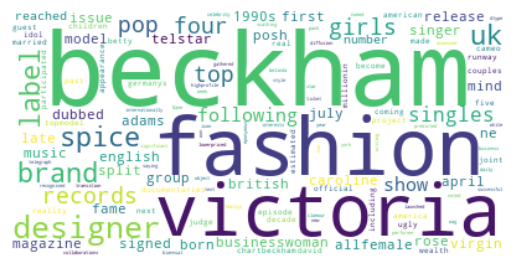

In [53]:
searchstr=str(search['text'])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(searchstr)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
dist,ind = knn_model.kneighbors(tfidf_weight[search.index[0]])
pd.DataFrame({'reference_label':people.loc[ind[0]]['name'],'reference_link':people.loc[ind[0]]['URI']})

,reference_label,reference_link
50411,Victoria Beckham,<http://dbpedia.org/resource/Victoria_Beckham>
23386,David Beckham,<http://dbpedia.org/resource/David_Beckham>
17264,Mel B,<http://dbpedia.org/resource/Mel_B>
39144,Stephen Dow Beckham,<http://dbpedia.org/resource/Stephen_Dow_Beckham>
5385,Hilary Alexander,<http://dbpedia.org/resource/Hilary_Alexander>


Input list ideas:<br>
Adele , Taylor Swift , Angelina Jolie , Arnold Schwarzenegger , Victoria Beckham

# Comparing the benifit of using tf-idf over count vectorization based of count

In [46]:
# count vectorization KNN model
knn_model_wordcounts = KNeighborsClassifier(algorithm='brute',metric='cosine')
knn_model_wordcounts.fit(count,people['name']) #using count

KNeighborsClassifier(algorithm='brute', metric='cosine')

In [47]:
#TF-IDF KNN MODEL 
knn_model_tfidf = KNeighborsClassifier(algorithm='brute',metric='cosine')
knn_model_tfidf.fit(tfidf_weight,people['name']) #using tfidf_weigh

KNeighborsClassifier(algorithm='brute', metric='cosine')

In [48]:
search = people[people['name'] == 'Adele']

In [49]:
#WORDCOUNT
dist,ind = knn_model_wordcounts.kneighbors(tfidf_weight[search.index[0]])
pd.DataFrame({'reference_label':people.loc[ind[0]]['name'],'distance':dist[0]})

,reference_label,distance
27793,Adele,0.236523
55438,Alicia Keys,0.439739
29297,Kelly Clarkson,0.441437
11639,Pink (singer),0.455048
35807,Joss Stone,0.457098


In [50]:
#TFIDF
dist,ind = knn_model_tfidf.kneighbors(tfidf_weight[search.index[0]])
pd.DataFrame({'reference_label':people.loc[ind[0]]['name'],'distance':dist[0]})

,reference_label,distance
27793,Adele,6.661338e-16
29297,Kelly Clarkson,5.365372e-01
35807,Joss Stone,5.589540e-01
317,Carrie Underwood,5.599131e-01
24857,Rihanna,5.655675e-01


We can see that without tfids we get Alicia Keys closer to Adele that Kelly clarkson which should not be the case
using tf-idf we can see that the recommondations are more apt to the current article as all the recommended are artist of current time 